## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, ComplementNB, GaussianNB, MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
import os

## Prepare and visualize data

In [3]:
data = pd.read_csv('./data/train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(42000, 785)

In [6]:
x = data.drop(columns='label')
x = x.to_numpy()
x = x.astype("float32")/255.0

y = data['label']
y = y.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
x = x.reshape(42000,28,28)/256
x = np.expand_dims(x, 3)
x.shape

(42000, 28, 28, 1)

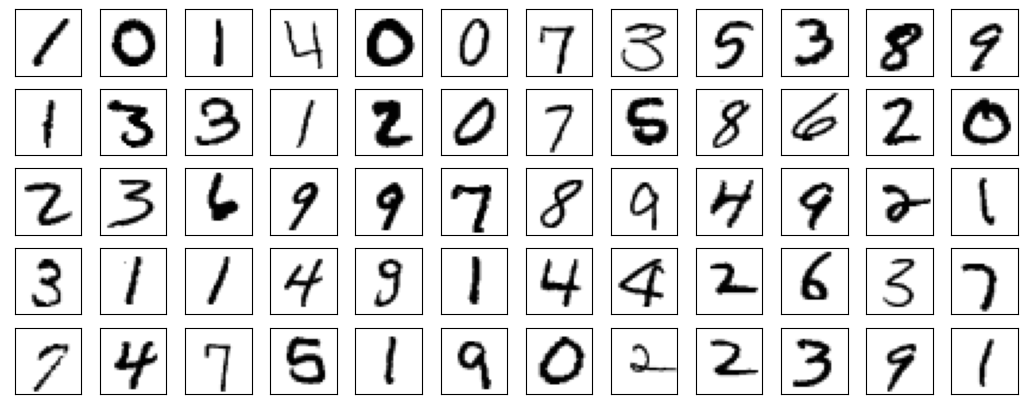

In [8]:
fig, axs = plt.subplots(5,12,figsize=(13,5))

for i in range(5):
    for j in range(12):
        axs[i,j].imshow(x[12*i+j,:,:,0]*(-1)+1,cmap='gray')
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)

## Plot confusion matrix

In [9]:
def plot_confusion_matrix(y_true, y_pred):
    
    conf_matrix = confusion_matrix(y_true, y_pred) 
    
    fig, ax = plt.subplots(figsize=(5, 8))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.8)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')
 
    plt.xlabel('Predictions', fontsize=12)
    plt.ylabel('Actuals', fontsize=12)
    plt.title('Confusion Matrix', fontsize=12)
    plt.show()

## Logistic Regression 

In [47]:
model = LogisticRegression(max_iter=500, multi_class='ovr', random_state=0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=500, multi_class='ovr', random_state=0)

In [75]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       810
           1       0.94      0.97      0.96       926
           2       0.91      0.88      0.89       852
           3       0.90      0.88      0.89       875
           4       0.92      0.93      0.93       817
           5       0.88      0.86      0.87       800
           6       0.94      0.96      0.95       821
           7       0.92      0.93      0.93       861
           8       0.87      0.86      0.87       802
           9       0.91      0.90      0.90       836

    accuracy                           0.92      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.92      0.91      8400



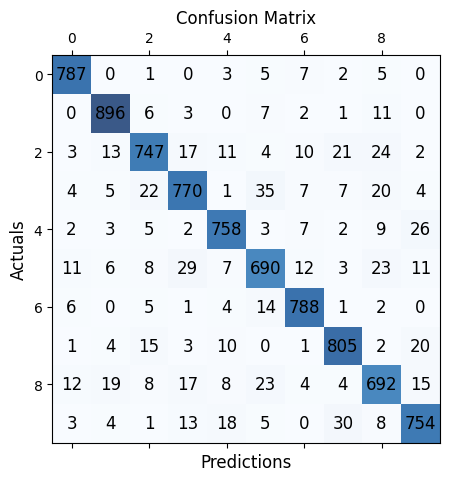

In [76]:
plot_confusion_matrix(y_test, y_pred)

## Perceptron

In [78]:
model = Perceptron(random_state=0)
model.fit(x_train, y_train)

Perceptron()

In [79]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       810
           1       0.97      0.91      0.94       926
           2       0.85      0.89      0.87       852
           3       0.89      0.85      0.87       875
           4       0.94      0.84      0.89       817
           5       0.89      0.74      0.80       800
           6       0.97      0.90      0.94       821
           7       0.92      0.90      0.91       861
           8       0.68      0.91      0.78       802
           9       0.80      0.90      0.85       836

    accuracy                           0.88      8400
   macro avg       0.89      0.88      0.88      8400
weighted avg       0.89      0.88      0.88      8400



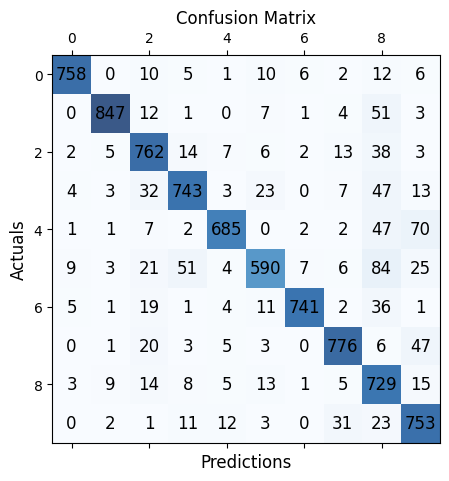

In [80]:
plot_confusion_matrix(y_test, y_pred)

## Ridge Classifier

In [83]:
model = RidgeClassifier(random_state=0)
model.fit(x_train, y_train)

RidgeClassifier(random_state=0)

In [84]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       810
           1       0.82      0.97      0.89       926
           2       0.90      0.78      0.83       852
           3       0.83      0.83      0.83       875
           4       0.83      0.89      0.86       817
           5       0.87      0.71      0.78       800
           6       0.88      0.93      0.90       821
           7       0.85      0.86      0.86       861
           8       0.83      0.74      0.78       802
           9       0.82      0.81      0.82       836

    accuracy                           0.85      8400
   macro avg       0.85      0.85      0.85      8400
weighted avg       0.85      0.85      0.85      8400



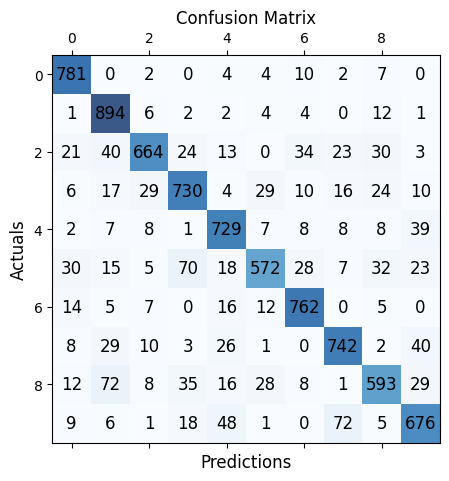

In [85]:
plot_confusion_matrix(y_test, y_pred)

## SGD Classifier

In [87]:
model = RidgeClassifier(random_state=0)
model.fit(x_train, y_train)

RidgeClassifier(random_state=0)

In [88]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       810
           1       0.82      0.97      0.89       926
           2       0.90      0.78      0.83       852
           3       0.83      0.83      0.83       875
           4       0.83      0.89      0.86       817
           5       0.87      0.71      0.78       800
           6       0.88      0.93      0.90       821
           7       0.85      0.86      0.86       861
           8       0.83      0.74      0.78       802
           9       0.82      0.81      0.82       836

    accuracy                           0.85      8400
   macro avg       0.85      0.85      0.85      8400
weighted avg       0.85      0.85      0.85      8400



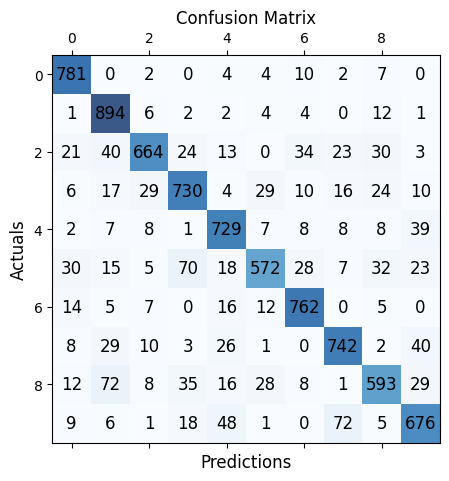

In [89]:
plot_confusion_matrix(y_test, y_pred)

## Bernoulli Naive Bayes

In [94]:
model = BernoulliNB()
model.fit(x_train, y_train)

BernoulliNB()

In [95]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       810
           1       0.89      0.96      0.92       926
           2       0.87      0.83      0.85       852
           3       0.75      0.82      0.78       875
           4       0.83      0.81      0.82       817
           5       0.79      0.69      0.74       800
           6       0.89      0.91      0.90       821
           7       0.92      0.85      0.88       861
           8       0.77      0.77      0.77       802
           9       0.74      0.82      0.78       836

    accuracy                           0.83      8400
   macro avg       0.84      0.83      0.83      8400
weighted avg       0.84      0.83      0.83      8400



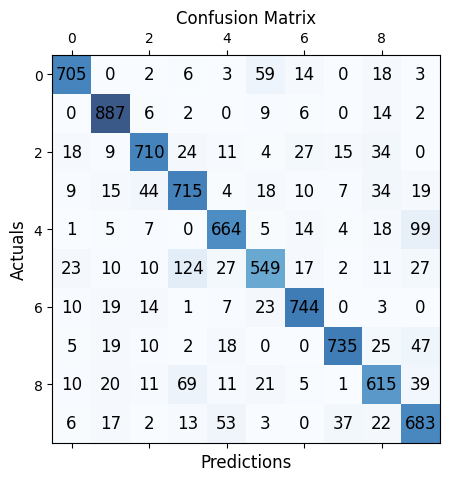

In [96]:
plot_confusion_matrix(y_test, y_pred)

## Complement Naive Bayes

In [103]:
model = ComplementNB()
model.fit(x_train, y_train)

ComplementNB()

In [104]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.89      0.70       810
           1       0.69      0.97      0.81       926
           2       0.82      0.70      0.76       852
           3       0.68      0.79      0.73       875
           4       0.92      0.56      0.70       817
           5       0.84      0.45      0.59       800
           6       0.78      0.86      0.82       821
           7       0.59      0.88      0.71       861
           8       0.83      0.38      0.52       802
           9       0.65      0.50      0.57       836

    accuracy                           0.70      8400
   macro avg       0.74      0.70      0.69      8400
weighted avg       0.74      0.70      0.69      8400



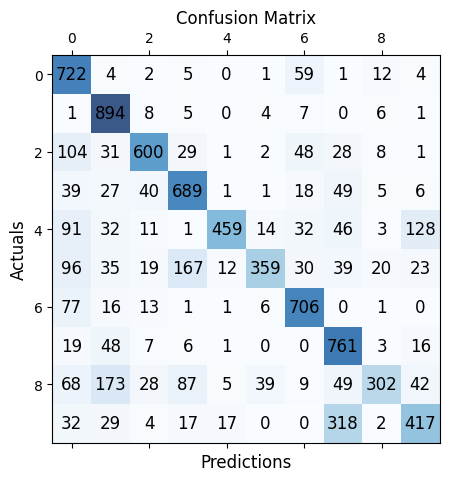

In [105]:
plot_confusion_matrix(y_test, y_pred)

## Gaussian Naive Bayes

In [106]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [107]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.79       810
           1       0.81      0.94      0.87       926
           2       0.87      0.24      0.38       852
           3       0.69      0.39      0.50       875
           4       0.85      0.18      0.29       817
           5       0.62      0.04      0.08       800
           6       0.59      0.96      0.73       821
           7       0.89      0.33      0.48       861
           8       0.29      0.61      0.40       802
           9       0.38      0.94      0.54       836

    accuracy                           0.55      8400
   macro avg       0.67      0.55      0.51      8400
weighted avg       0.68      0.55      0.51      8400



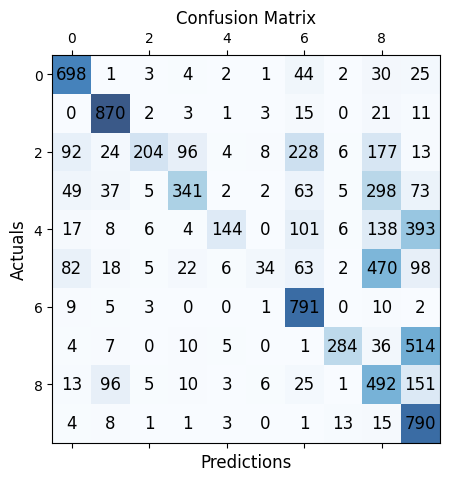

In [108]:
plot_confusion_matrix(y_test, y_pred)

## Multinomial Naive Bayes 

In [109]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [110]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       810
           1       0.89      0.93      0.91       926
           2       0.87      0.83      0.85       852
           3       0.78      0.82      0.80       875
           4       0.83      0.75      0.79       817
           5       0.86      0.64      0.74       800
           6       0.87      0.92      0.89       821
           7       0.94      0.83      0.88       861
           8       0.62      0.78      0.69       802
           9       0.70      0.82      0.76       836

    accuracy                           0.82      8400
   macro avg       0.83      0.82      0.82      8400
weighted avg       0.83      0.82      0.82      8400



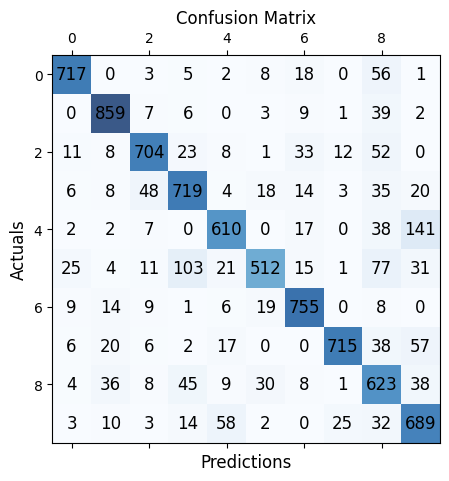

In [111]:
plot_confusion_matrix(y_test, y_pred)

## K-Neighbors Classifier

In [125]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [126]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       810
           1       0.96      0.99      0.97       926
           2       0.99      0.96      0.97       852
           3       0.96      0.96      0.96       875
           4       0.98      0.96      0.97       817
           5       0.95      0.96      0.95       800
           6       0.98      0.99      0.98       821
           7       0.95      0.97      0.96       861
           8       0.98      0.92      0.95       802
           9       0.95      0.95      0.95       836

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



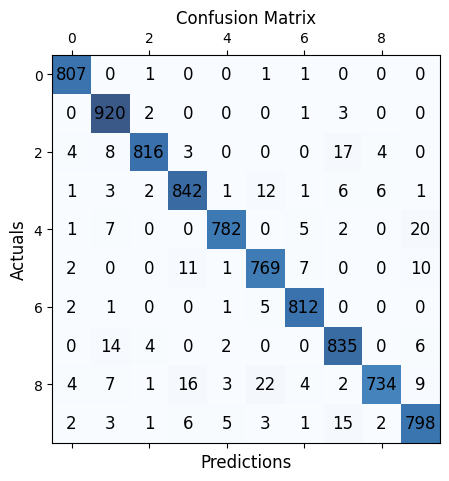

In [127]:
plot_confusion_matrix(y_test, y_pred)

## Linear Support Vector Classification.

In [15]:
model = LinearSVC()
model.fit(x_train, y_train)

LinearSVC()

In [16]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       807
           1       0.95      0.97      0.96       941
           2       0.90      0.88      0.89       840
           3       0.89      0.88      0.88       866
           4       0.90      0.92      0.91       772
           5       0.86      0.86      0.86       777
           6       0.94      0.94      0.94       825
           7       0.91      0.93      0.92       862
           8       0.88      0.85      0.86       847
           9       0.89      0.86      0.88       863

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400



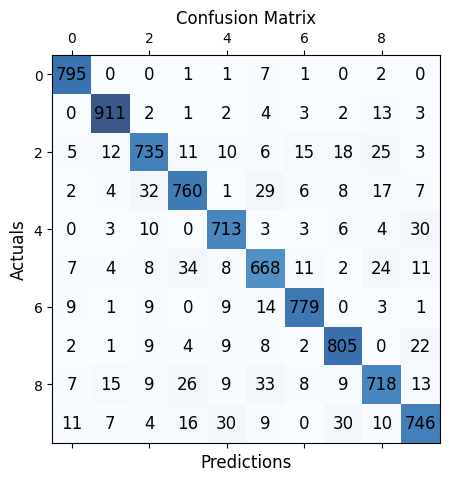

In [17]:
plot_confusion_matrix(y_test, y_pred)

## Nu-Support Vector Classification

In [18]:
model = NuSVC()
model.fit(x_train, y_train)

NuSVC()

In [19]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       807
           1       0.89      0.97      0.93       941
           2       0.91      0.88      0.89       840
           3       0.92      0.87      0.90       866
           4       0.89      0.94      0.91       772
           5       0.89      0.93      0.91       777
           6       0.94      0.93      0.94       825
           7       0.94      0.90      0.92       862
           8       0.91      0.85      0.88       847
           9       0.90      0.86      0.88       863

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400



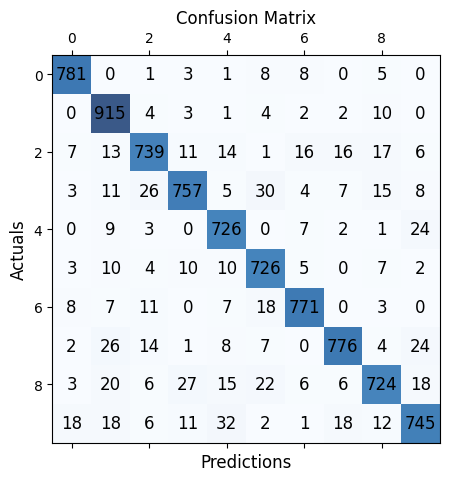

In [20]:
plot_confusion_matrix(y_test, y_pred)

## C-Support Vector Classification

In [ ]:
model = SVC()
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

In [ ]:
plot_confusion_matrix(y_test, y_pred)